Populating the interactive namespace from numpy and matplotlib


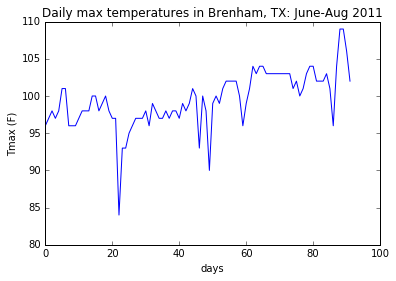

In [1]:
%pylab inline
import numpy as np
reader = open("tmax.txt", "r")
max_temp = np.fromfile(reader, sep=" ")
x_axis = np.linspace(0, 91, 92)
pylab.plot(x_axis, max_temp)
pylab.xlim(0, 100)
pylab.ylabel("Tmax (F)")
pylab.xlabel("days")
pylab.title("Daily max temperatures in Brenham, TX: June-Aug 2011")

Populating the interactive namespace from numpy and matplotlib
data for the month of 2
data for the month of 8


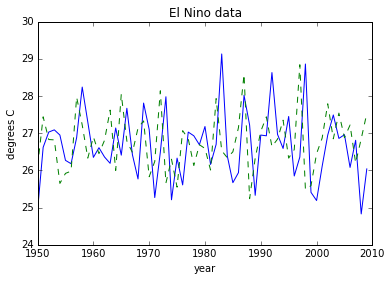

In [89]:
import netCDF4 as nc
import collections
%pylab inline

nino_data = {}
def read_data(filename, variable):
    dictionary = {}
    ncfile = nc.Dataset(filename)
    extract = ncfile.variables[variable]
    years = ncfile.variables["year"]
    the_years = years[:]
    data = extract[:]
    unit = str(extract.units)
    dictionary["data"] = data
    dictionary["data_units"] = unit
    dictionary["year"] = the_years
    return dictionary

def nino_plot(month, linestyle):
    values = nino_data.values()
    keys = nino_data.keys()
    the_data = values[0]
    monthly_data = the_data[:,month-1]
    years = values[2]
    print "data for the month of", month
    pylab.plot(years, monthly_data, linestyle)
    pylab.xlabel(keys[2])
    pylab.ylabel(values[1])
    pylab.title("El Nino data")
nino_data = read_data("elnino34.ncd", "nino")
# Plot El Nino index for February (solid)
nino_plot(2, "-")

# Overplot El Nino index for August (dashed)
nino_plot(8, "--")